In [1]:
import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [2]:
# Load data from https://www.openml.org/d/554
print('Loading data...')  # Now let's load the data

from sklearn.datasets import fetch_openml    # this is another great online source of data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)   # we will load the digits dataset
print('Done')

Loading data...
Done


Shape of X: (70000, 784) 
 Shape of y: (70000,)


(-0.5, 27.5, 27.5, -0.5)

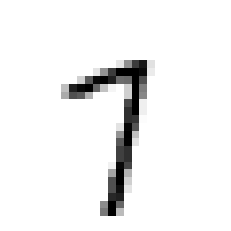

In [3]:
# The dataset should consist of 70000 rows and 784 columns. 
# Each column contains the pixel intensities of one 28 x 28 (784) image 
# Each image is of a handwritten digit: 0,1, ..., 9

# Let's check the dataset size
print('Shape of X:', X.shape, '\n', 'Shape of y:', y.shape)

# Let's see what one image looks like 
digit = X[42]  
digit_pixels = digit.reshape(28, 28)  # from 784 vector to 28 x 28 image
fig = plt.imshow(digit_pixels, cmap=plt.cm.binary)
plt.axis('off')

In [4]:
# train on first 60K rows, test on all the rows after that
X_train, X_test = X[:60000], X[60000:]  
y_train, y_test = y[:60000], y[60000:]  
print('Done')

Done


In [5]:
# rescale the data
X_train = X_train / 255.
print('Done')

Done


In [6]:
# Design the classifier neural network
mlp = MLPClassifier(hidden_layer_sizes=(50,), # one hidden layer with 50 neurons
                    activation = 'relu',  # ReLU is the default option
                    # solver='sgd',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init=.1 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=10,  # number of epochs, default=200
                    random_state=42,
                    verbose=10, 
                    )

# Train the classifier
# NOTE: this example won't converge because our max_iter choice is too few epochs 
# (otherwise it will take too long for a live demo), 
# so we catch the warning and ignore it here
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

Iteration 1, loss = 0.65271122
Iteration 2, loss = 0.34928122
Iteration 3, loss = 0.33539398
Iteration 4, loss = 0.36946887
Iteration 5, loss = 0.35407548
Iteration 6, loss = 0.36753422
Iteration 7, loss = 0.36237379
Iteration 8, loss = 0.39253171
Iteration 9, loss = 0.44990445
Iteration 10, loss = 0.43864594
Training set score: 0.894200
Done


In [7]:
X_test = X_test / 255.    # rescale the test data using the same scaler as for the training set

y_predicted = mlp.predict(X_test)   # use the trained classifier to predict on the test set

print('\n clasification report:\n', classification_report(y_test, y_predicted))  # compare predictions with ground truth
print('Done')


 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.86       980
           1       0.99      0.97      0.98      1135
           2       0.94      0.89      0.92      1032
           3       0.96      0.83      0.89      1010
           4       0.94      0.92      0.93       982
           5       0.98      0.80      0.88       892
           6       0.94      0.96      0.95       958
           7       0.98      0.88      0.93      1028
           8       0.57      0.97      0.72       974
           9       0.87      0.91      0.89      1009

    accuracy                           0.89     10000
   macro avg       0.92      0.89      0.89     10000
weighted avg       0.92      0.89      0.90     10000

Done
